In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
sns.set()

In [2]:
df = pd.read_csv('results.csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
df.date = pd.to_datetime(df.date)
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [5]:
pandas_profiling.ProfileReport(df)

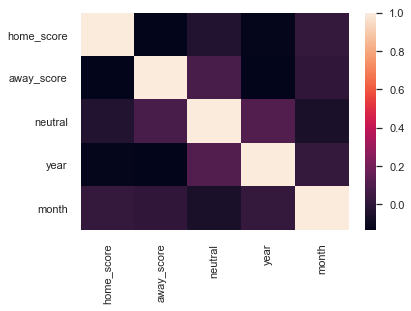

In [6]:
sns.heatmap(df.corr())

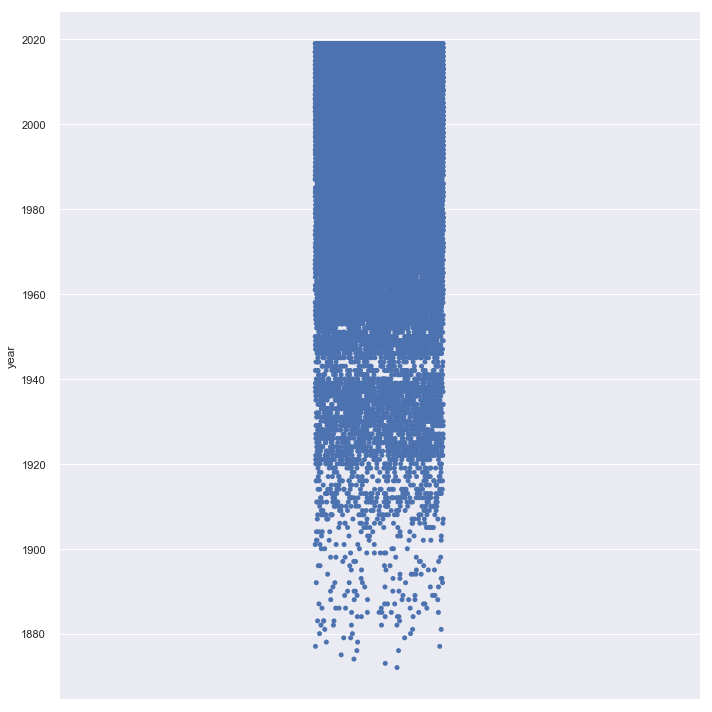

In [7]:
sns.catplot(y='year',
           height=10,
           data=df)

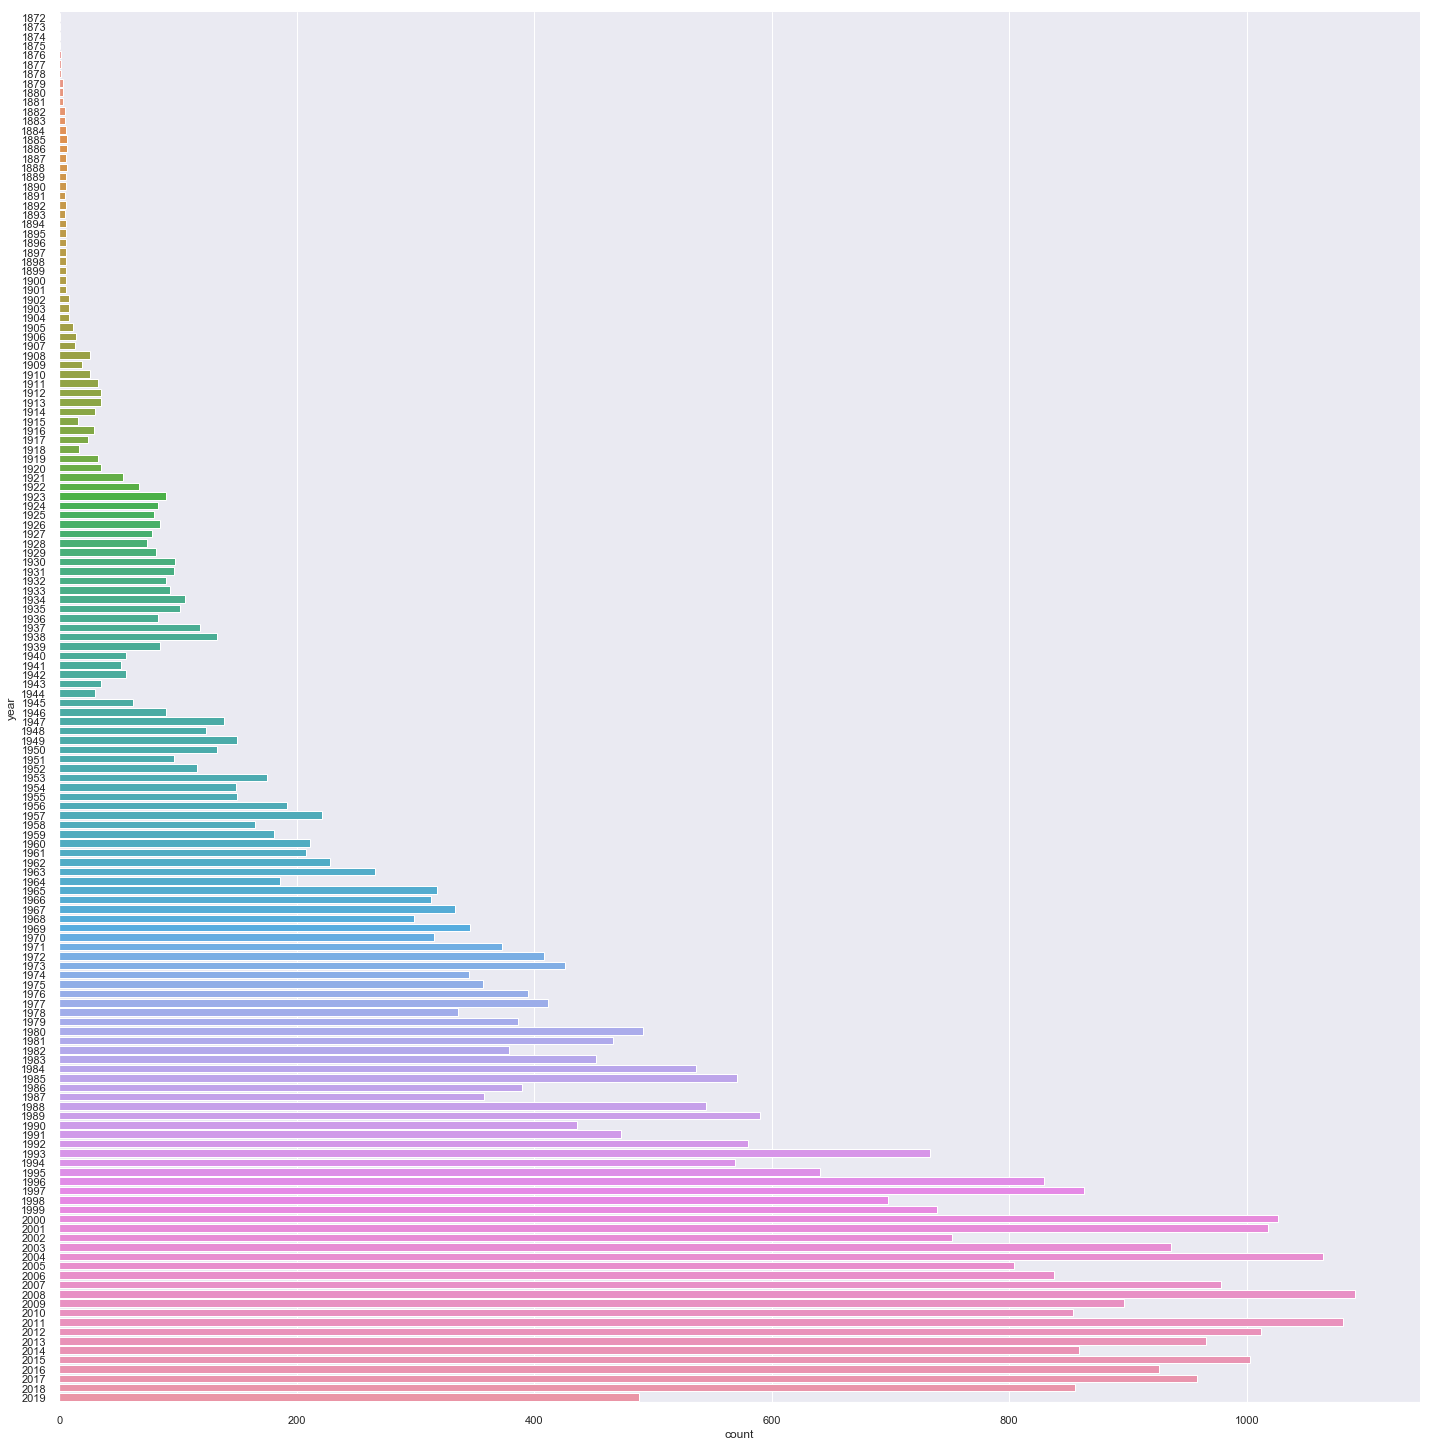

In [8]:
sns.catplot(y='year',
            kind='count',
           height=20,
           data=df)

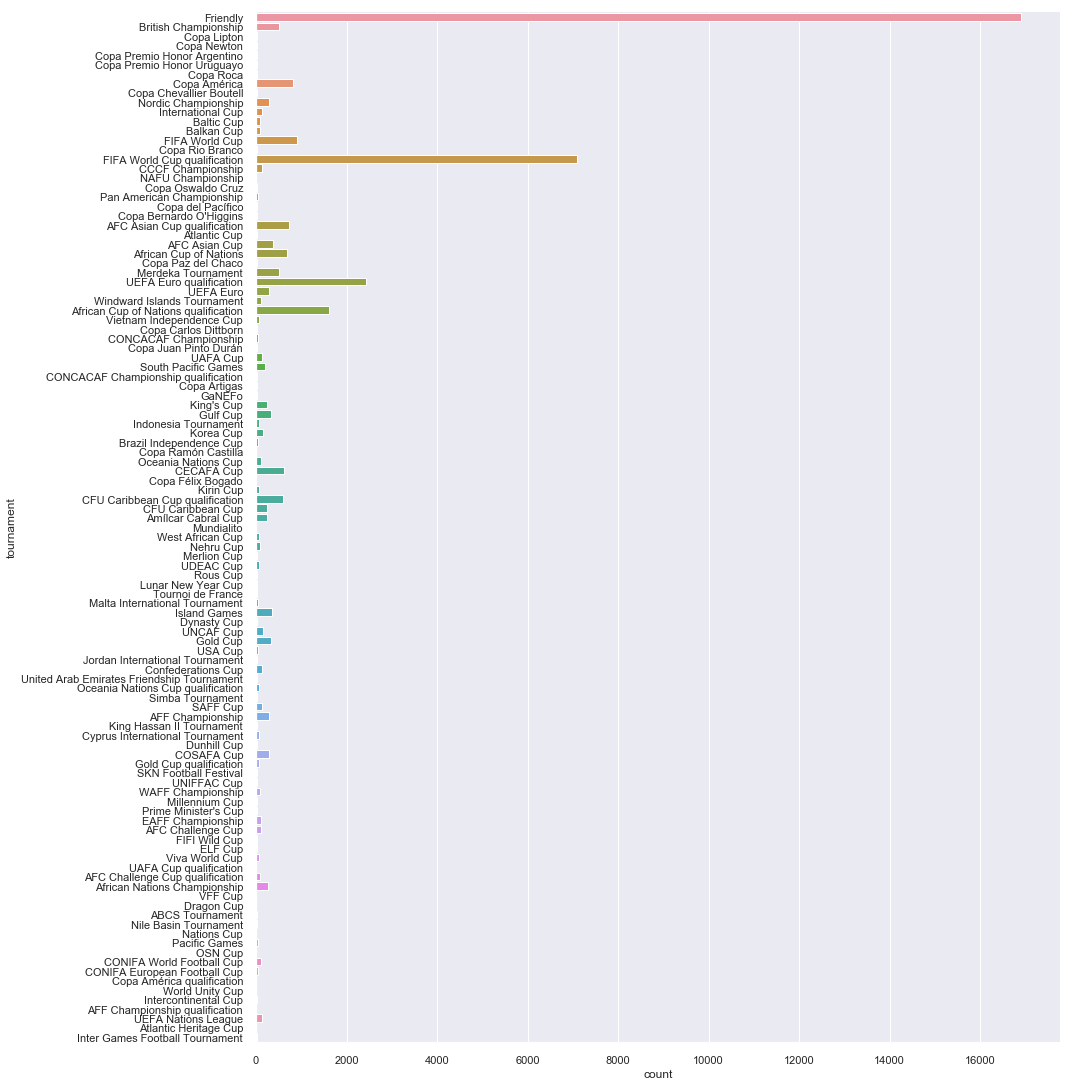

In [9]:
sns.catplot(y='tournament',
            kind='count',
           height=15,
           data=df)

In [10]:
mask1 = df['home_team'].isin(["England","Belgium","Portugal","Brazil","France"])
mask2 = df['away_team'].isin(["England","Belgium","Portugal","Brazil","France"])


In [11]:
hdf = df[mask1]
adf = df[mask2]

In [12]:
hdf.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,3
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,1879,1
11,1879-04-05,England,Scotland,5,4,Friendly,London,England,False,1879,4


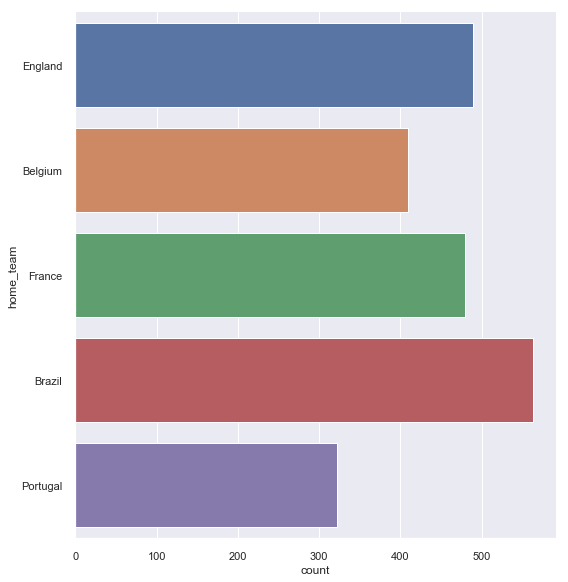

In [13]:
#amount of international games home
sns.catplot(y ='home_team',
           kind = 'count',
           height = 8,
           data=hdf)

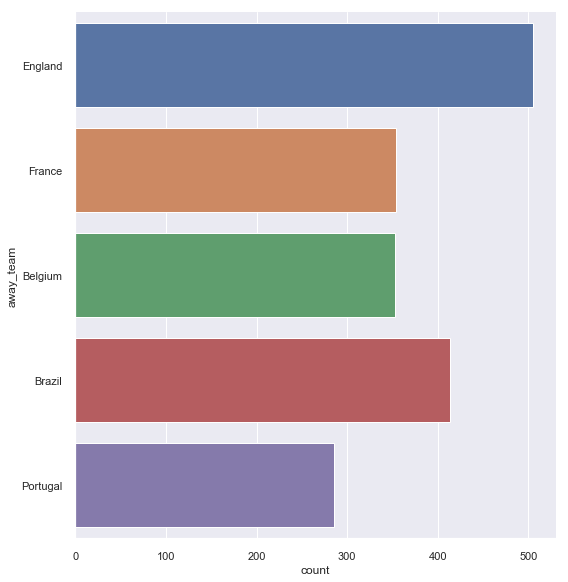

In [14]:
#amount of international games away
sns.catplot(y ='away_team',
           kind = 'count',
           height = 8,
           data=adf)

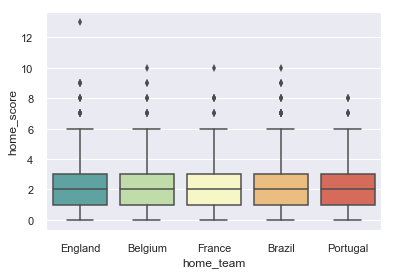

In [15]:
#avarge amount of goals scored at home 
sns.boxplot(x='home_team',y='home_score',data=hdf,palette='Spectral_r')

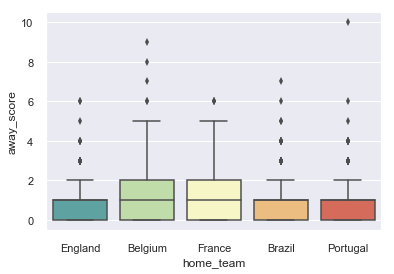

In [16]:
#avarge of goals tooked at home 
sns.boxplot(x='home_team',y='away_score',data=hdf,palette='Spectral_r')

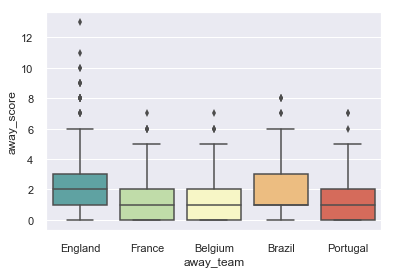

In [17]:
#average amount of goals scored away
sns.boxplot(x='away_team',y='away_score',data=adf,palette='Spectral_r')

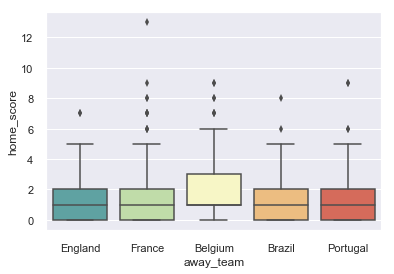

In [18]:
#average goals tooked away
sns.boxplot(x='away_team',y='home_score',data=adf,palette='Spectral_r')

In [19]:
#calculating amount of victories both home & away 
mask = hdf['home_score'] > hdf['away_score']
mask1 = adf['away_score'] > adf['home_score']
whdf = hdf[mask]
wadf  = adf[mask1]

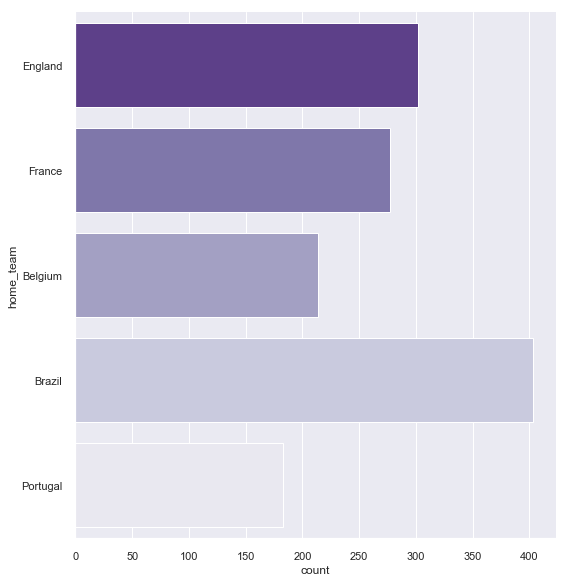

In [20]:
#amount of victories at home
sns.catplot(y = 'home_team',
           kind = 'count',
           height=8,
           data = whdf,
           palette='Purples_r')

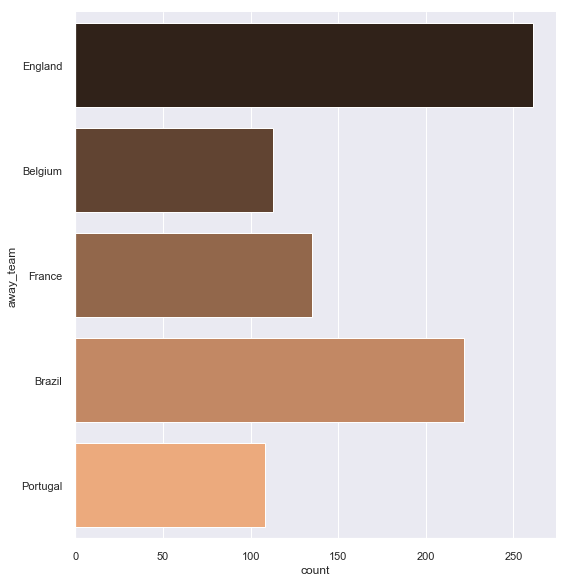

In [21]:
sns.catplot(y = 'away_team',
           kind = 'count',
           height=8,
           data = wadf,
           palette = 'copper')

In [22]:
#calculating the loosing amount home&away
mask = hdf['home_score'] < hdf['away_score']
mask1 = adf['away_score'] < adf['home_score']
lhdf = hdf[mask]
ladf  = adf[mask1]


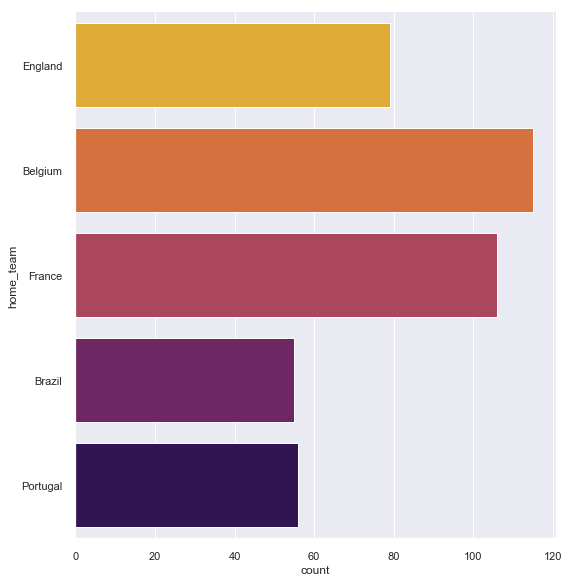

In [23]:
sns.catplot(y = 'home_team',
           kind = 'count',
           height=8,
           data = lhdf,
           palette='inferno_r')

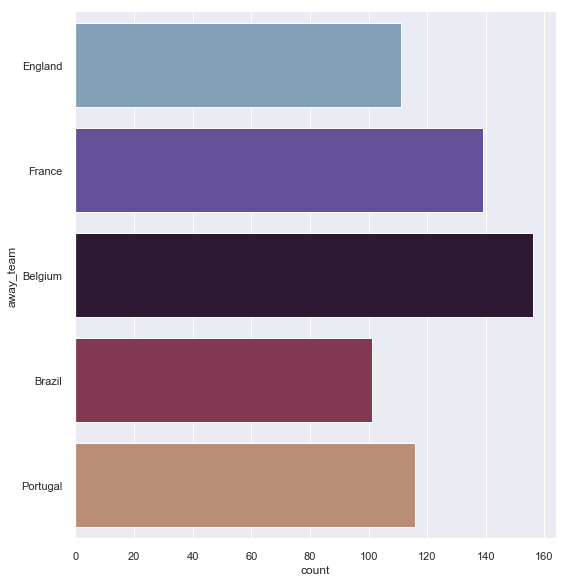

In [24]:
sns.catplot(y = 'away_team',
           kind = 'count',
           height=8,
           data = ladf,
           palette='twilight')